# Deep Learning Simulation

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display
import time
import datetime as dt
import os
import random
from IPython.display import clear_output

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [3]:
tf.random.set_seed(1234)

## 1. Data Analysis

In [4]:
# Reading csv with all features and target values
df = pd.read_csv("Final_Smooth_Alternative_Features_Spain.csv")

In [5]:
df.head()

,Country/Region,Date,Daily Confirmed Smooth,Daily Deaths Smooth,Positive Test Rate Smooth,Mobility Rate Smooth,Num Hospitalizations Smooth,Num UCI Smooth,Beta Smooth,Gamma Smooth,Mu Smooth
0,Spain,2020-03-21,2711.857143,168.571429,0.395,-0.528571,2826.142857,279.000000,0.193532,0.042238,0.014040
1,Spain,2020-03-22,2995.714286,211.857143,0.406,-0.545714,3106.571429,309.428571,0.190061,0.032033,0.015943
2,Spain,2020-03-23,3599.142857,281.285714,0.416,-0.555476,3509.571429,342.428571,0.186409,0.021829,0.015299
3,Spain,2020-03-24,4019.571429,325.000000,0.427,-0.563095,3920.285714,379.714286,0.181782,0.011625,0.017520
4,Spain,2020-03-25,5086.428571,432.000000,0.433,-0.570714,4222.285714,401.857143,0.173246,0.001421,0.017607


In [6]:
df.tail()

,Country/Region,Date,Daily Confirmed Smooth,Daily Deaths Smooth,Positive Test Rate Smooth,Mobility Rate Smooth,Num Hospitalizations Smooth,Num UCI Smooth,Beta Smooth,Gamma Smooth,Mu Smooth
723,Spain,2022-03-14,12507.000000,80.142857,0.173,-0.062619,318.142857,19.142857,0.068976,0.077341,0.000311
724,Spain,2022-03-15,14352.285714,79.571429,0.174,-0.069048,320.857143,18.285714,0.070035,0.077100,0.000243
725,Spain,2022-03-16,11218.571429,60.571429,0.176,-0.075476,324.857143,16.857143,0.077156,0.078181,0.000197
726,Spain,2022-03-17,7987.857143,48.428571,0.177,-0.080476,328.285714,17.428571,0.090718,0.079748,0.000391
727,Spain,2022-03-18,14380.428571,81.142857,0.178,-0.076190,333.857143,15.714286,0.093870,0.081923,0.000391


In [7]:
df.shape

(728, 11)

In [8]:
# Checking for no null values
df.isnull().values.any()

False

In [9]:
# Description of the dataframe
df.describe()

,Daily Confirmed Smooth,Daily Deaths Smooth,Positive Test Rate Smooth,Mobility Rate Smooth,Num Hospitalizations Smooth,Num UCI Smooth,Beta Smooth,Gamma Smooth,Mu Smooth
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,15557.764717,141.079474,0.111666,-0.109044,680.044152,65.338305,0.083144,0.067927,0.002118
std,25178.961540,154.240247,0.088658,0.152279,688.279005,63.579917,0.025321,0.024817,0.004744
min,253.571429,0.000000,0.015000,-0.606190,31.142857,2.571429,0.038871,0.000573,0.000000
25%,3592.964286,31.714286,0.051000,-0.155595,225.071429,19.964286,0.065003,0.051538,0.000326
50%,7687.214286,93.142857,0.085000,-0.073690,523.000000,57.214286,0.078661,0.069257,0.000801
75%,15999.321429,185.571429,0.137250,-0.016429,826.500000,84.464286,0.095254,0.085458,0.001323
max,144008.857143,865.714286,0.434000,0.091429,4590.714286,421.857143,0.193532,0.142449,0.037187


In [10]:
df.corr()

,Daily Confirmed Smooth,Daily Deaths Smooth,Positive Test Rate Smooth,Mobility Rate Smooth,Num Hospitalizations Smooth,Num UCI Smooth,Beta Smooth,Gamma Smooth,Mu Smooth
Daily Confirmed Smooth,1.000000,0.056163,0.752591,0.084741,0.350322,0.234948,0.108194,-0.222121,-0.187443
Daily Deaths Smooth,0.056163,1.000000,0.398774,-0.755240,0.701427,0.653896,-0.265599,-0.296331,0.371916
Positive Test Rate Smooth,0.752591,0.398774,1.000000,-0.264946,0.740638,0.617439,0.287647,-0.355434,0.039396
Mobility Rate Smooth,0.084741,-0.755240,-0.264946,1.000000,-0.546479,-0.491043,0.070637,0.332849,-0.527138
Num Hospitalizations Smooth,0.350322,0.701427,0.740638,-0.546479,1.000000,0.971878,0.166225,-0.207917,0.194803
Num UCI Smooth,0.234948,0.653896,0.617439,-0.491043,0.971878,1.000000,0.168779,-0.127670,0.167615
Beta Smooth,0.108194,-0.265599,0.287647,0.070637,0.166225,0.168779,1.000000,0.223547,0.034889
Gamma Smooth,-0.222121,-0.296331,-0.355434,0.332849,-0.207917,-0.127670,0.223547,1.000000,-0.026215
Mu Smooth,-0.187443,0.371916,0.039396,-0.527138,0.194803,0.167615,0.034889,-0.026215,1.000000


In [11]:
labels = ['Daily Confirmed Smooth', 'Daily Deaths Smooth', 'Positive Test Rate Smooth', 'Mobility Rate Smooth',
          'Num Hospitalizations Smooth', 'Num UCI Smooth', 'Beta Smooth', 'Gamma Smooth', 'Mu Smooth']

## 2. Data Preprocessing

In [12]:
# Obtaining data values
Inf = df["Daily Confirmed Smooth"].values
Deaths = df["Daily Deaths Smooth"].values
Test = df["Positive Test Rate Smooth"].values
Mobility = df["Mobility Rate Smooth"].values
Hosp = df["Num Hospitalizations Smooth"].values
UCI = df["Num UCI Smooth"].values
date = df["Date"].values

print(Inf[0], Deaths[0], Test[0], Mobility[0], Hosp[0], UCI[0], date[0])
Inf.shape, Deaths.shape, Test.shape, Mobility.shape, Hosp.shape, UCI.shape, date.shape

2711.8571428571427 168.57142857142858 0.395 -0.5285714285714286 2826.1428571428573 279.0 2020-03-21


((728,), (728,), (728,), (728,), (728,), (728,), (728,))

In [13]:
# Obtaining target values
mu = df["Mu Smooth"].values
beta = df["Beta Smooth"].values
gamma = df["Gamma Smooth"].values

print(mu[0], beta[0], gamma[0])
mu.shape, beta.shape, gamma.shape

0.0140397953403922 0.1935317998669637 0.0422375080523535


((728,), (728,), (728,))

**Merging features values and target values in separate arrays:**

In [14]:
# X_total array
columns = 6
X_total = np.empty((len(Inf), columns))

for i in range(len(X_total)):
    X_total[i] = [Inf[i], Deaths[i], Test[i], Mobility[i], Hosp[i], UCI[i]]

X_total.shape, X_total[0:5]

((728, 6),
 array([[ 2.71185714e+03,  1.68571429e+02,  3.95000000e-01,
         -5.28571429e-01,  2.82614286e+03,  2.79000000e+02],
        [ 2.99571429e+03,  2.11857143e+02,  4.06000000e-01,
         -5.45714286e-01,  3.10657143e+03,  3.09428571e+02],
        [ 3.59914286e+03,  2.81285714e+02,  4.16000000e-01,
         -5.55476190e-01,  3.50957143e+03,  3.42428571e+02],
        [ 4.01957143e+03,  3.25000000e+02,  4.27000000e-01,
         -5.63095238e-01,  3.92028571e+03,  3.79714286e+02],
        [ 5.08642857e+03,  4.32000000e+02,  4.33000000e-01,
         -5.70714286e-01,  4.22228571e+03,  4.01857143e+02]]))

In [15]:
# y_total array
columns = 3
y_total = np.empty((len(mu), columns))

for i in range(len(y_total)):
    y_total[i] = [beta[i], gamma[i], mu[i]]

y_total.shape, y_total[0:5]

((728, 3),
 array([[0.1935318 , 0.04223751, 0.0140398 ],
        [0.19006098, 0.03203343, 0.01594338],
        [0.18640881, 0.02182934, 0.01529925],
        [0.18178154, 0.01162526, 0.01751999],
        [0.1732455 , 0.00142118, 0.01760706]]))

**Total data:**

In [16]:
# Total data
X_deep = X_total
y_deep = y_total
date_deep = date

print(X_deep[-1], y_deep[-1], date_deep[-1])
X_deep.shape, y_deep.shape, date_deep.shape

[ 1.43804286e+04  8.11428571e+01  1.78000000e-01 -7.61904762e-02
  3.33857143e+02  1.57142857e+01] [0.09386952 0.08192275 0.00039076] 2022-03-18


((728, 6), (728, 3), (728,))

In [17]:
# Getting individual target values
y_deep_beta = np.empty((len(y_deep), 1))
y_deep_gamma = np.empty((len(y_deep), 1))
y_deep_mu = np.empty((len(y_deep), 1))

for i in range(len(y_deep)):
    y_deep_beta[i] = y_deep[i][0]
    y_deep_gamma[i] = y_deep[i][1]
    y_deep_mu[i] = y_deep[i][2]

y_deep_beta.shape, y_deep_gamma.shape, y_deep_mu.shape, y_deep_beta[0:10]

((728, 1),
 (728, 1),
 (728, 1),
 array([[0.1935318 ],
        [0.19006098],
        [0.18640881],
        [0.18178154],
        [0.1732455 ],
        [0.16472806],
        [0.15344641],
        [0.14287167],
        [0.13099804],
        [0.12051686]]))

**Cut time series data into sequences:**

In [18]:
# Definition of the time step
time_steps = 7

X_deep_series = np.empty((len(X_deep) - time_steps, time_steps, 6))
y_deep_beta_series = np.empty(((len(y_deep_beta) - time_steps, 1)))
y_deep_gamma_series = np.empty(((len(y_deep_gamma) - time_steps, 1)))
y_deep_mu_series = np.empty(((len(y_deep_mu) - time_steps, 1)))

# Creation of the sequential X and y data
for i in range(0, len(X_deep) - time_steps, 1):
    X_deep_series[i] = X_deep[i:(i+time_steps)]
    y_deep_beta_series[i] = y_deep_beta[(i+time_steps)-1]
    y_deep_gamma_series[i] = y_deep_gamma[(i+time_steps)-1]
    y_deep_mu_series[i] = y_deep_mu[(i+time_steps)-1]

X_deep_series.shape, y_deep_beta_series.shape, y_deep_gamma_series.shape, y_deep_mu_series.shape

((721, 7, 6), (721, 1), (721, 1), (721, 1))

**Standardization of datasets:**

In [19]:
# Standarization of the features
def standarizer_feature(X_data):

    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
    # StandardScaler: Standardize features by removing the mean and scaling to unit variance
    from sklearn.preprocessing import StandardScaler

    # Definition of scaler object: one for the features
    feature_scaler = StandardScaler()

    # Fit and transform of the object from the train data (fetuares)
    X_data_S = feature_scaler.fit_transform(X_data.reshape(-1, X_data.shape[-1])).reshape(X_data.shape)
    
    return(feature_scaler, X_data_S)

In [20]:
# Standarization of the targets (individually)
def standarizer_target(y_data):

    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
    # StandardScaler: Standardize features by removing the mean and scaling to unit variance
    from sklearn.preprocessing import StandardScaler

    # Definition of scaler object: one for the features
    target_scaler = StandardScaler()

    # Fit and transform of the object from the train data (target)
    y_data_S = target_scaler.fit_transform(y_data)
    
    return(target_scaler, y_data_S)

In [21]:
# Features standarization
feature_scaler, X_train_S = standarizer_feature(X_deep_series)

# Targets standarization
beta_scaler, y_beta_train_S = standarizer_target(y_deep_beta_series)
gamma_scaler, y_gamma_train_S = standarizer_target(y_deep_gamma_series)
mu_scaler, y_mu_train_S = standarizer_target(y_deep_mu_series)

len(X_train_S), len(y_beta_train_S), len(y_gamma_train_S), len(y_mu_train_S), X_train_S[0], y_beta_train_S[0], y_gamma_train_S[0], y_mu_train_S[0]

(721,
 721,
 721,
 721,
 array([[-0.51099311,  0.17882551,  3.28465829, -2.8035507 ,  3.23042879,
          3.4979141 ],
        [-0.49975991,  0.4590579 ,  3.41146278, -2.91766806,  3.6507224 ,
          3.99411865],
        [-0.47588015,  0.90853956,  3.5267396 , -2.98265155,  4.25472049,
          4.53225598],
        [-0.45924234,  1.19154653,  3.65354409, -3.03337038,  4.87028041,
          5.14028127],
        [-0.41702312,  1.88426621,  3.72271018, -3.0840892 ,  5.32290429,
          5.50136909],
        [-0.39317728,  2.35686936,  3.73423786, -3.07457942,  5.68367593,
          5.73432898],
        [-0.362163  ,  2.87479061,  3.65354409, -3.09993884,  5.8750883 ,
          5.82751293]]),
 array([2.99513875]),
 array([-2.29231593]),
 array([3.41443939]))

## 3. Representation of the features

In [22]:
# Function to standarize each feature individually
def standarizer_ind(data):
    
    # Import StandardScaler for setting the same unit scale
    from sklearn.preprocessing import StandardScaler
    
    # Reshape the data
    data_reshape = np.empty((len(data),1), dtype=object)
    for i in range(0, len(data), 1):
        data_reshape[i] = data[i]
    
    # Scale the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_reshape)
    
    return(data_scaled)

In [23]:
# Rescale all the features
Inf_norm = standarizer_ind(Inf)
Deaths_norm = standarizer_ind(Deaths)
Test_norm = standarizer_ind(Test)
Mobility_norm = standarizer_ind(Mobility)
Hosp_norm = standarizer_ind(Hosp)
UCI_norm = standarizer_ind(UCI)

In [24]:
# Transform 'Date' string format
date_label = []
for i in range(0, len(date), 1):
    date_changed = dt.datetime.strptime(date[i],'%Y-%m-%d').date()
    date_label.append(date_changed.strftime('%d/%m/%y')) 

len(date_label), date_label[0:10]

(728,
 ['21/03/20',
  '22/03/20',
  '23/03/20',
  '24/03/20',
  '25/03/20',
  '26/03/20',
  '27/03/20',
  '28/03/20',
  '29/03/20',
  '30/03/20'])

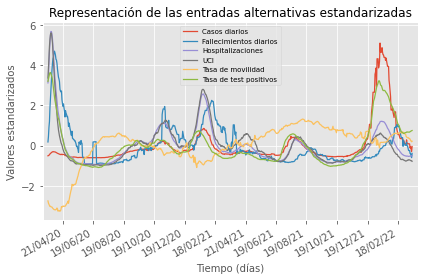

In [25]:
# Importing the style package
from matplotlib import style
import matplotlib.dates as mdates
# Using the style for the plot
plt.style.use('ggplot')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.plot(date_label, Inf_norm, label = 'Casos diarios', linewidth = 1.25)
plt.plot(date_label, Deaths_norm, label = 'Fallecimientos diarios', linewidth = 1.25)
plt.plot(date_label, Hosp_norm, label = 'Hospitalizaciones', linewidth = 1.25)
plt.plot(date_label, UCI_norm, label = 'UCI', linewidth = 1.25)
plt.plot(date_label, Mobility_norm, label = 'Tasa de movilidad', linewidth = 1.25)
plt.plot(date_label, Test_norm, label = 'Tasa de test positivos', linewidth = 1.25)

plt.ylabel('Valores estandarizados', size = 'medium')
plt.xlabel('Tiempo (días)', size = 'medium')
plt.title('Representación de las entradas alternativas estandarizadas', size = 'large')
plt.legend(loc = 'best', fontsize = 'x-small')
plt.gcf().autofmt_xdate()
plt.xlim(left=-10, right=len(date_label)+10)
plt.tight_layout()
plt.savefig('Entradas_alt_escaladas.png', format='png', dpi=300, facecolor='white', bbox_inches='tight')

plt.show()

It is obvious that when Daily Infections grow, so do all other features except mobility. When Daily Infections grow, the Mobility Rate tend to decrease.

## 4. Creation of imaginary future scenarios

**Daily Infected Creation:**

In [26]:
init = 500
Inf_try = np.empty(50, dtype=object)

Inf_try[0] = init
for i in range(1, 5, 1):
    Inf_try[i] = Inf_try[i-1] + (Inf_try[i-1]/6)
for i in range(5, 15, 1):
    Inf_try[i] = Inf_try[i-1] + (Inf_try[i-1]/10)
for i in range(15, len(Inf_try), 1):
    Inf_try[i] = Inf_try[i-1] + (Inf_try[i-1]/14)

Text(0.5, 1.0, 'Daily Infected Real')

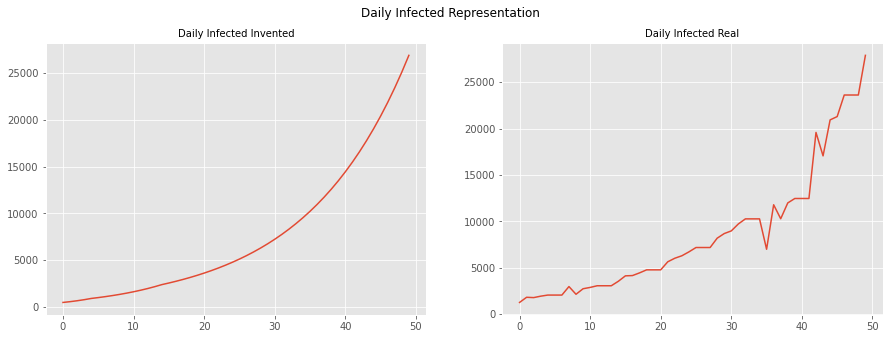

In [27]:
# Multiplot explanation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Daily Infected Representation')

# Plot for daily infected invented
ax1.plot(Inf_try)
ax1.set_title('Daily Infected Invented', size='medium')
# Plot for daily infected real
ax2.plot(Inf[590:640])
ax2.set_title('Daily Infected Real', size='medium')

**Daily Deaths Creation:**

In [28]:
init = 25
Deaths_try = np.empty(50, dtype=object)

Deaths_try[0] = init
for i in range(1, 32, 1):
    Deaths_try[i] = random.randrange(15, 25)
for i in range(32, 37, 1):
    Deaths_try[i] = Deaths_try[i-1] + (Deaths_try[i-1]/20)
for i in range(37, 42, 1):
    Deaths_try[i] = random.randrange(37, 40)
for i in range(42, len(Deaths_try), 1):
    Deaths_try[i] = Deaths_try[i-1] + (Deaths_try[i-1]/20)

Text(0.5, 1.0, 'Daily Deahts Real')

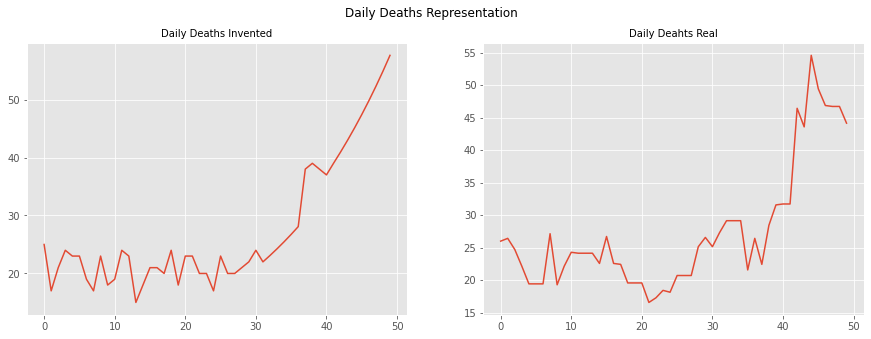

In [29]:
# Multiplot explanation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Daily Deaths Representation')

# Plot for daily deaths invented
ax1.plot(Deaths_try)
ax1.set_title('Daily Deaths Invented', size='medium')
# Plot for daily deaths real
ax2.plot(Deaths[590:640])
ax2.set_title('Daily Deahts Real', size='medium')

**Hospitalizations Creation:**

In [30]:
init = 115
Hosp_try = np.empty(50, dtype=object)

Hosp_try[0] = init
for i in range(1, 6, 1):
    Hosp_try[i] = random.randrange(110, 135)
for i in range(6, 10, 1):
    Hosp_try[i] = random.randrange(140, 150)
for i in range(10, 15, 1):
    Hosp_try[i] = Hosp_try[i-1] + (Hosp_try[i-1]/30)
for i in range(15, 28, 1):
    Hosp_try[i] = Hosp_try[i-1] + (Hosp_try[i-1]/30)
for i in range(28, 35, 1):
    Hosp_try[i] = random.randrange(int(Hosp_try[28-1]-2), int(Hosp_try[28-1]+5))
for i in range(35, len(Hosp_try), 1):
    Hosp_try[i] = Hosp_try[i-1] + (Hosp_try[i-1]/30)

Text(0.5, 1.0, 'Hospitalizations Real')

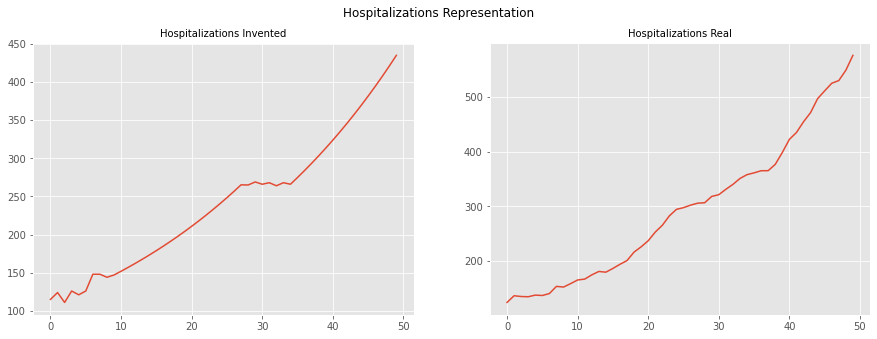

In [31]:
# Multiplot explanation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Hospitalizations Representation')

# Plot for hospitalizations invented
ax1.plot(Hosp_try)
ax1.set_title('Hospitalizations Invented', size='medium')
# Plot for hospitalizations real
ax2.plot(Hosp[590:640])
ax2.set_title('Hospitalizations Real', size='medium')

**UCI Creation:**

In [32]:
init = 13
UCI_try = np.empty(50, dtype=object)

UCI_try[0] = init
for i in range(1, 6, 1):
    UCI_try[i] = random.randrange(12, 15)
for i in range(6, 10, 1):
    UCI_try[i] = random.randrange(18, 20)
for i in range(10, 18, 1):
    UCI_try[i] = random.randrange(19, 22)
for i in range(18, 30, 1):
    UCI_try[i] = UCI_try[i-1] + (UCI_try[i-1]/20)
for i in range(30, len(UCI_try), 1):
    UCI_try[i] = UCI_try[i-1] + (UCI_try[i-1]/30)

Text(0.5, 1.0, 'UCI Real')

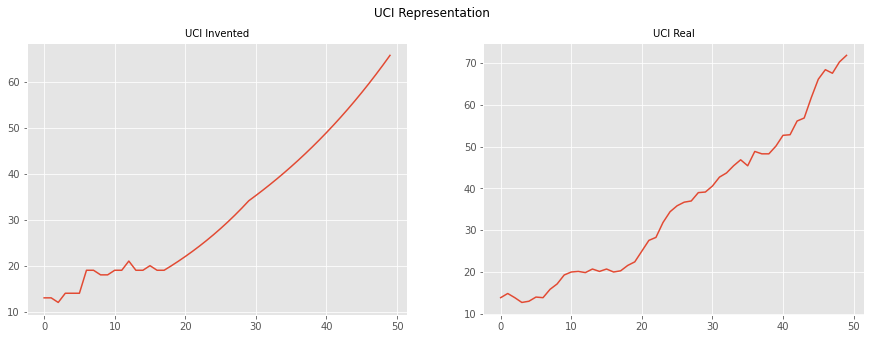

In [33]:
# Multiplot explanation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('UCI Representation')

# Plot for UCI invented
ax1.plot(UCI_try)
ax1.set_title('UCI Invented', size='medium')
# Plot for UCI real
ax2.plot(UCI[590:640])
ax2.set_title('UCI Real', size='medium')

**Test Creation:**

In [34]:
init = 0.03
Test_try = np.empty(50, dtype=object)

Test_try[0] = init
for i in range(1, 12, 1):
    Test_try[i] = Test_try[i-1] + (Test_try[i-1]/40)
for i in range(12, 35, 1):
    Test_try[i] = Test_try[i-1] + (Test_try[i-1]/32)
for i in range(35, len(Test_try), 1):
    Test_try[i] = Test_try[i-1] + (Test_try[i-1]/22)

Text(0.5, 1.0, 'Test Real')

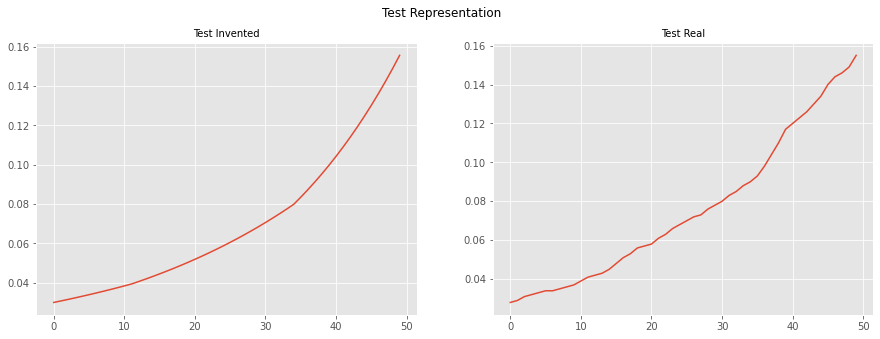

In [35]:
# Multiplot explanation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Test Representation')

# Plot for test invented
ax1.plot(Test_try)
ax1.set_title('Test Invented', size='medium')
# Plot for test real
ax2.plot(Test[590:640])
ax2.set_title('Test Real', size='medium')

**Mobility Creation:**

In [36]:
init = -0.04
Mobility_reg = np.empty(50, dtype=object)

Mobility_reg[0] = init
for i in range(1, 15, 1):
    Mobility_reg[i] = random.uniform(-0.02, -0.03)
for i in range(15, 30, 1):
    Mobility_reg[i] = random.uniform(-0.035, -0.055)
for i in range(30, len(Mobility_reg), 1):
    Mobility_reg[i] = random.uniform(-0.020, -0.065)
    
Mobility_rest = np.empty(50, dtype=object)

Mobility_rest[0] = init
for i in range(1, 7, 1):
    Mobility_rest[i] = random.uniform(-0.02, -0.03)
for i in range(7, 13, 1):
    Mobility_rest[i] = Mobility_rest[i-1] + Mobility_rest[i-1]/15
for i in range(13, 17, 1):
    Mobility_rest[i] = Mobility_rest[i-1] + Mobility_rest[i-1]/10
for i in range(17, 22, 1):
    Mobility_rest[i] = Mobility_rest[i-1] + Mobility_rest[i-1]/10
for i in range(22, 28, 1):
    Mobility_rest[i] = random.uniform(Mobility_rest[20-1]+0.002, Mobility_rest[20-1]-0.04)
for i in range(26, 38, 1):
    Mobility_rest[i] = Mobility_rest[i-1] + Mobility_rest[i-1]/20
for i in range(38, 42, 1):
    Mobility_rest[i] = random.uniform(Mobility_rest[38-1]+0.002, Mobility_rest[38-1]-0.03)
for i in range(42, len(Mobility_rest), 1):
    Mobility_rest[i] = Mobility_rest[i-1] + Mobility_rest[i-1]/15

Text(0.5, 1.0, 'Mobility With Restrictions')

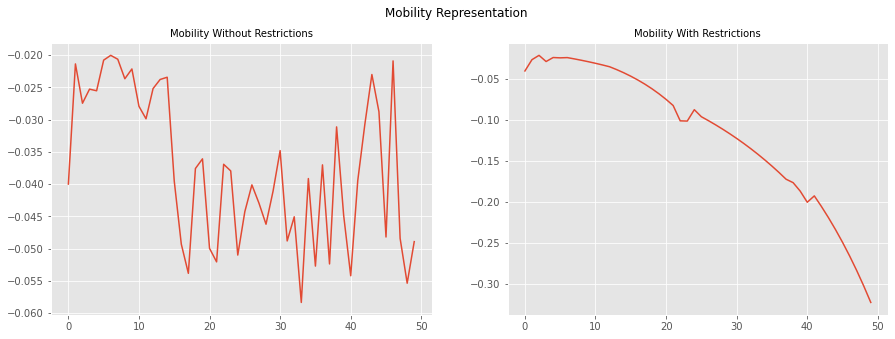

In [37]:
# Multiplot explanation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Mobility Representation')

# Plot for mobility no restricted
ax1.plot(Mobility_reg)
ax1.set_title('Mobility Without Restrictions', size='medium')
# Plot for mobility restricted
ax2.plot(Mobility_rest)
ax2.set_title('Mobility With Restrictions', size='medium')

## 5. Deep Learning Training

In [38]:
# Parameters definition
neu = (128, 64)
drop = 0.5
act = ('relu', 'relu')
loss = 'mse'

In [39]:
# Bi LSTM 
def BiLstm(train_data, y_train, neuron, act_fun, drop_perc, loss_fun):
    tf.random.set_seed(1234)
    from keras.layers import Dense, LSTM, Dropout, Bidirectional
    
    model = keras.Sequential()
    model.add(Bidirectional(LSTM(neuron[0], activation = act_fun[0], return_sequences=True), input_shape = train_data.shape[1:]))
    model.add(Dropout(drop_perc))
    model.add(Bidirectional(LSTM(neuron[1], activation = act_fun[1]), input_shape = train_data.shape[1:]))
    model.add(Dense(train_data.shape[1]))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss=loss_fun, metrics=[loss_fun])
    history = model.fit(train_data, y_train, epochs = 3000, verbose = 0)
    
    return (model, history)

In [40]:
# Function to plot the loss for every epoch
def plot_loss(history, file_name):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    # Summarize history for loss
    plt.plot(history.history['loss'], label = 'train', color = 'blue')
    # plt.plot(history.history['val_loss'], label = 'test', color = 'orange')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    
    # Saving plot
    name_file = file_name + '.png' 
    plt.savefig(name_file, format='png', dpi=300, facecolor='white')
    
    plt.show()

In [41]:
# Function to predict the training data
def predict_train(model, X_train_S, y_train_S, y_scaler):
    # Training prediction and rescale
    y_train_pred = model.predict(X_train_S)
    y_train_pred_inv = y_scaler.inverse_transform(y_train_pred)
    
    # Training real data rescale
    y_train_real_inv = y_scaler.inverse_transform(y_train_S)
    
    return(y_train_pred_inv, y_train_real_inv)

In [42]:
# Function to plot the train prediction
def plot_train(y_train_real, y_train_pred, file_name):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.plot(y_train_real, label = 'Real', color = 'blue')
    plt.plot(y_train_pred, label = 'Pred', color = 'orange')
    plt.title('Y train')
    plt.legend(loc='best')
    
    # Saving plot
    name_file = file_name + '.png' 
    plt.savefig(name_file, format='png', dpi=300, facecolor='white')
    
    plt.show()

In [43]:
# Beta Training
BiLSTM_beta_trained, history_beta = BiLstm(X_train_S, y_beta_train_S, neu, act, drop, loss)

In [44]:
# Gamma Training
BiLSTM_gamma_trained, history_gamma = BiLstm(X_train_S, y_gamma_train_S, neu, act, drop, loss)

In [45]:
# Mu Training
BiLSTM_mu_trained, history_mu = BiLstm(X_train_S, y_mu_train_S, neu, act, drop, loss)

**Beta Representation:**

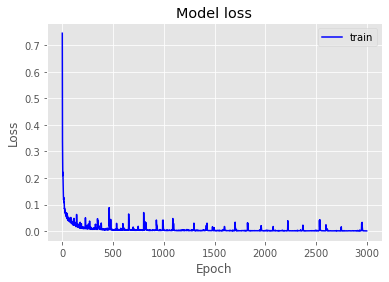

In [46]:
# Beta Loss Representation
plot_loss(history_beta, 'Beta_Train_Loss')

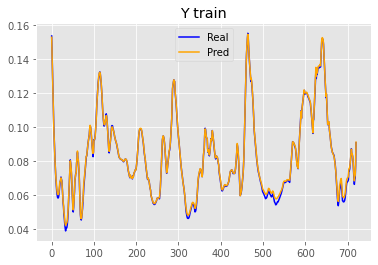

In [47]:
# Beta Prediction Representation
y_train_beta_pred_inv, y_train_beta_real_inv = predict_train(BiLSTM_beta_trained, X_train_S, y_beta_train_S, beta_scaler)
plot_train(y_train_beta_real_inv, y_train_beta_pred_inv, 'Beta_Train_Pred')

**Gamma Representation:**

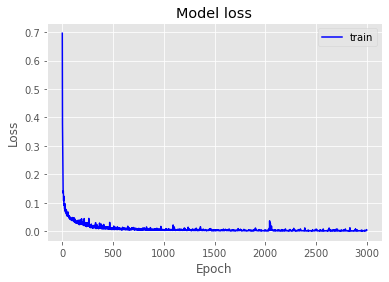

In [48]:
# Gamma Loss Representation
plot_loss(history_gamma, 'Gamma_Train_Loss')

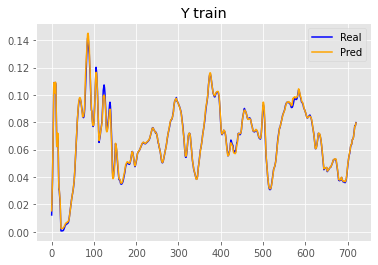

In [49]:
# Gamma Prediction Representation
y_train_gamma_pred_inv, y_train_gamma_real_inv = predict_train(BiLSTM_gamma_trained, X_train_S, y_gamma_train_S, gamma_scaler)
plot_train(y_train_gamma_real_inv, y_train_gamma_pred_inv, 'Gamma_Train_Pred')

**Mu Representation:**

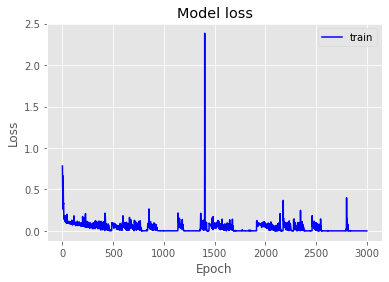

In [50]:
# Mu Loss Representation
plot_loss(history_mu, 'Mu_Train_Loss')

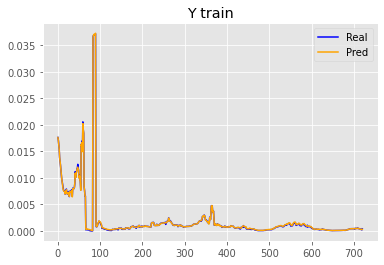

In [51]:
# Mu Prediction Representation
y_train_mu_pred_inv, y_train_mu_real_inv = predict_train(BiLSTM_mu_trained, X_train_S, y_mu_train_S, mu_scaler)
plot_train(y_train_mu_real_inv, y_train_mu_pred_inv, 'Mu_Train_Pred')

## 6. Simulation

In [52]:
# X_tests array
columns = 6
X_test_no = np.empty((len(Inf_try), columns))
X_test_rest = np.empty((len(Inf_try), columns))

for i in range(len(X_test_no)):
    X_test_no[i] = [Inf_try[i], Deaths_try[i], Test_try[i], Mobility_reg[i], Hosp_try[i], UCI_try[i]]
    X_test_rest[i] = [Inf_try[i], Deaths_try[i], Test_try[i], Mobility_rest[i], Hosp_try[i], UCI_try[i]]

X_test_no.shape, X_test_rest.shape, X_test_no[-5:], X_test_rest[-5:]

((50, 6),
 (50, 6),
 array([[ 2.03959500e+04,  4.74047438e+01,  1.30260157e-01,
         -4.82109566e-02,  3.81528045e+02,  5.76596784e+01],
        [ 2.18528036e+04,  4.97749809e+01,  1.36181073e-01,
         -2.08873250e-02,  3.94245646e+02,  5.95816677e+01],
        [ 2.34137181e+04,  5.22637300e+01,  1.42371122e-01,
         -4.84208473e-02,  4.07387168e+02,  6.15677233e+01],
        [ 2.50861266e+04,  5.48769165e+01,  1.48842537e-01,
         -5.53788148e-02,  4.20966740e+02,  6.36199807e+01],
        [ 2.68779928e+04,  5.76207623e+01,  1.55608106e-01,
         -4.89289546e-02,  4.34998965e+02,  6.57406467e+01]]),
 array([[ 2.03959500e+04,  4.74047438e+01,  1.30260157e-01,
         -2.49344747e-01,  3.81528045e+02,  5.76596784e+01],
        [ 2.18528036e+04,  4.97749809e+01,  1.36181073e-01,
         -2.65967731e-01,  3.94245646e+02,  5.95816677e+01],
        [ 2.34137181e+04,  5.22637300e+01,  1.42371122e-01,
         -2.83698913e-01,  4.07387168e+02,  6.15677233e+01],
        [ 

In [53]:
# Time-series creation
time_steps = 7

X_test_no_series = np.empty((len(X_test_no) - time_steps, time_steps, 6))
X_test_rest_series = np.empty((len(X_test_rest) - time_steps, time_steps, 6))

# Creation of the sequential X data
for i in range(0, len(X_test_no) - time_steps, 1):
    X_test_no_series[i] = X_test_no[i:(i+time_steps)]
    X_test_rest_series[i] = X_test_rest[i:(i+time_steps)]
    
X_test_no_series.shape, X_test_rest_series.shape

((43, 7, 6), (43, 7, 6))

In [54]:
# Standarization of the data with the feature scaler used in the training data
X_test_no_S = feature_scaler.fit_transform(X_test_no_series.reshape(-1, X_test_no_series.shape[-1])).reshape(X_test_no_series.shape)
X_test_rest_S = feature_scaler.fit_transform(X_test_rest_series.reshape(-1, X_test_rest_series.shape[-1])).reshape(X_test_rest_series.shape)

X_test_no_S[0:1], X_test_rest_S[0:1]

(array([[[-1.1072782 , -0.07237273, -1.27076593, -0.21411448,
          -1.64963544, -1.34255925],
         [-1.09253148, -0.98856635, -1.24411472,  1.45074945,
          -1.5255818 , -1.34255925],
         [-1.07532697, -0.53046954, -1.21679723,  0.90593372,
          -1.70477038, -1.41834059],
         [-1.05525504, -0.18689693, -1.1887968 ,  1.10120804,
          -1.49801433, -1.26677791],
         [-1.03183779, -0.30142113, -1.16009636,  1.07848406,
          -1.56693301, -1.26677791],
         [-1.01544572, -0.30142113, -1.13067841,  1.50312399,
          -1.49801433, -1.26677791],
         [-0.99741444, -0.75951794, -1.10052501,  1.5692105 ,
          -1.19477212, -0.88787121]]]),
 array([[[-1.1072782 , -0.07237273, -1.27076593,  0.94968445,
          -1.64963544, -1.34255925],
         [-1.09253148, -0.98856635, -1.24411472,  1.15354112,
          -1.5255818 , -1.34255925],
         [-1.07532697, -0.53046954, -1.21679723,  1.23139587,
          -1.70477038, -1.41834059],
       

In [55]:
# Beta prediction
beta_no_pred_S = BiLSTM_beta_trained.predict(X_test_no_S)
beta_rest_pred_S = BiLSTM_beta_trained.predict(X_test_rest_S)

beta_no_pred = beta_scaler.inverse_transform(beta_no_pred_S)
beta_rest_pred = beta_scaler.inverse_transform(beta_rest_pred_S)

In [56]:
# Gamma prediction
gamma_no_pred_S = BiLSTM_gamma_trained.predict(X_test_no_S)
gamma_rest_pred_S = BiLSTM_gamma_trained.predict(X_test_rest_S)

gamma_no_pred = gamma_scaler.inverse_transform(gamma_no_pred_S)
gamma_rest_pred = gamma_scaler.inverse_transform(gamma_rest_pred_S)

In [57]:
# Mu prediction
mu_no_pred_S = BiLSTM_mu_trained.predict(X_test_no_S)
mu_rest_pred_S = BiLSTM_mu_trained.predict(X_test_rest_S)

mu_no_pred = mu_scaler.inverse_transform(mu_no_pred_S)
mu_rest_pred = mu_scaler.inverse_transform(mu_rest_pred_S)

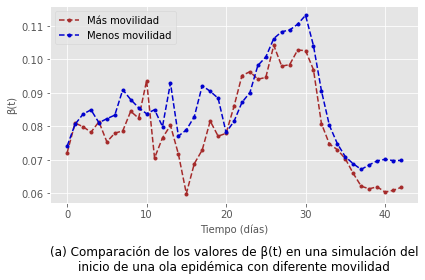

In [58]:
# Beta Representation
plt.plot(beta_no_pred, '.--', label='Más movilidad', color = 'brown')
plt.plot(beta_rest_pred, '.--', label='Menos movilidad', color = 'mediumblue')
plt.xlabel('Tiempo (días)', size = 'medium')
plt.ylabel('β(t)', size = 'medium')
plt.suptitle('(a) Comparación de los valores de β(t) en una simulación del\ninicio de una ola epidémica con diferente movilidad', 
             y = 0, x = 0.55, size = 'large')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Simulación_beta.png', format='png', dpi=300, facecolor='white', bbox_inches='tight')

plt.show()

## 7. Representation

In [59]:
N = 47332614
S = 45000000
I = 40000
D = 20000
R = N-S-I-D

In [60]:
# SIRD Definition

def SIRD_EDOs(S, I, R, D, mu, beta, gamma):
    EDOs_sol = [None] * 4
    # Solución de dS
    EDOs_sol[0] = -((beta*S*I)/(S+I+R+D))
    # Solución de dI
    EDOs_sol[1] = ((beta*S*I)/(S+I+R+D)) - (gamma*I) - (mu*I)
    # Solución de dR
    EDOs_sol[2] = (gamma*I)
    # Solución de dD
    EDOs_sol[3] = (mu*I)
    return(EDOs_sol)

In [61]:
# Function for resolution day by day with RK

def RK_resolution(S_initial, I_initial, R_initial, D_initial, beta_initial, gamma_initial, mu_initial, h):
    
    time = np.arange(0, 1+h, h)  # Time scale in the sub-intervals
    
    # Final result vectors definition
    # The extension "_K" is for data calculated with the Runge-Kutta method
    S_SIRD_K = np.empty(len(time), dtype = float)
    S_SIRD_K[0] = S_initial
    I_SIRD_K = np.empty(len(time), dtype = float)
    I_SIRD_K[0] = I_initial
    R_SIRD_K = np.empty(len(time), dtype = float)
    R_SIRD_K[0] = R_initial
    D_SIRD_K = np.empty(len(time), dtype = float)
    D_SIRD_K[0] = D_initial
    
    # RK resolution for a specific number of days
    for n in range(1, len(time)):
        
        # First Step of RK4 method
        K1 = SIRD_EDOs(S_SIRD_K[n-1], I_SIRD_K[n-1], R_SIRD_K[n-1], D_SIRD_K[n-1],
                       mu_initial, beta_initial, gamma_initial)
        # Second Step of RK4 method
        K1_S = K1[0]; K1_I = K1[1]; K1_R = K1[2]; K1_D = K1[3]
        K2 = SIRD_EDOs(S_SIRD_K[n-1] + ((h/2)*K1_S), I_SIRD_K[n-1] + ((h/2)*K1_I),
                       R_SIRD_K[n-1] + ((h/2)*K1_R), D_SIRD_K[n-1] + ((h/2)*K1_D),
                       mu_initial, beta_initial, gamma_initial)
        # Third Step of RK4 method
        K2_S = K2[0]; K2_I = K2[1]; K2_R = K2[2]; K2_D = K2[3]
        K3 = SIRD_EDOs(S_SIRD_K[n-1] + ((h/2)*K2_S), I_SIRD_K[n-1] + ((h/2)*K2_I),
                       R_SIRD_K[n-1] + ((h/2)*K2_R), D_SIRD_K[n-1] + ((h/2)*K2_D),
                       mu_initial, beta_initial, gamma_initial)
        # Fourth Step of RK4 method
        K3_S = K3[0]; K3_I = K3[1]; K3_R = K3[2]; K3_D = K3[3]
        K4 = SIRD_EDOs(S_SIRD_K[n-1] + (h*K3_S), I_SIRD_K[n-1] + (h*K3_I), 
                       R_SIRD_K[n-1] + (h*K3_R), D_SIRD_K[n-1] + (h*K3_D),
                       mu_initial, beta_initial, gamma_initial)
        # Solution
        K4_S = K4[0]; K4_I = K4[1]; K4_R = K4[2]; K4_D = K4[3]
        S_SIRD_K[n] = S_SIRD_K[n-1] + ((h/6)*(K1_S + 2*K2_S + 2*K3_S + K4_S))
        I_SIRD_K[n] = I_SIRD_K[n-1] + ((h/6)*(K1_I + 2*K2_I + 2*K3_I + K4_I))
        R_SIRD_K[n] = R_SIRD_K[n-1] + ((h/6)*(K1_R + 2*K2_R + 2*K3_R + K4_R))
        D_SIRD_K[n] = D_SIRD_K[n-1] + ((h/6)*(K1_D + 2*K2_D + 2*K3_D + K4_D))
    
    # Save the result for the next day (last value of the array)
    S_Solution_Next = S_SIRD_K[-1]
    I_Solution_Next = I_SIRD_K[-1]
    R_Solution_Next = R_SIRD_K[-1]
    D_Solution_Next = D_SIRD_K[-1]
    
    return(S_Solution_Next, I_Solution_Next, R_Solution_Next, D_Solution_Next)

In [62]:
# Complete resolution
S_estimated_no = []
I_estimated_no = []
R_estimated_no = []
D_estimated_no = []

S_estimated_rest = []
I_estimated_rest = []
R_estimated_rest = []
D_estimated_rest = []

S_estimated_no.append(S)
I_estimated_no.append(I)
R_estimated_no.append(R)
D_estimated_no.append(D)

S_estimated_rest.append(S)
I_estimated_rest.append(I)
R_estimated_rest.append(R)
D_estimated_rest.append(D)

# Loop that will estimate from the second day to the last day: the first day can not be estimated
for i in range(1, len(beta_no_pred)+1, 1):
    
    # Initial values and parameters
    S_initial_no = S_estimated_no[i-1]
    I_initial_no = I_estimated_no[i-1]
    R_initial_no = R_estimated_no[i-1]
    D_initial_no = D_estimated_no[i-1]
    beta_initial_no = beta_no_pred[i-1]
    gamma_initial_no = gamma_no_pred[i-1]
    mu_initial_no = mu_no_pred[i-1]
    
    S_initial_rest = S_estimated_rest[i-1]
    I_initial_rest = I_estimated_rest[i-1]
    R_initial_rest = R_estimated_rest[i-1]
    D_initial_rest = D_estimated_rest[i-1]
    beta_initial_rest = beta_rest_pred[i-1]
    gamma_initial_rest = gamma_rest_pred[i-1]
    mu_initial_rest = mu_rest_pred[i-1]
    
    # Resolution for the next day
    S_next_no, I_next_no, R_next_no, D_next_no = RK_resolution(S_initial_no, I_initial_no, R_initial_no, D_initial_no, 
                                                               beta_initial_no, gamma_initial_no, mu_initial_no, h = 0.20)
    
    S_next_rest, I_next_rest, R_next_rest, D_next_rest = RK_resolution(S_initial_rest, I_initial_rest, R_initial_rest, D_initial_rest, 
                                                                       beta_initial_rest, gamma_initial_rest, mu_initial_rest, h = 0.20)
    
    # Saving the results
    S_estimated_no.append(S_next_no)
    I_estimated_no.append(I_next_no)
    R_estimated_no.append(R_next_no)
    D_estimated_no.append(D_next_no)
    
    S_estimated_rest.append(S_next_rest)
    I_estimated_rest.append(I_next_rest)
    R_estimated_rest.append(R_next_rest)
    D_estimated_rest.append(D_next_rest)

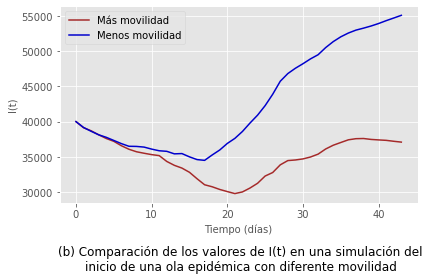

In [63]:
# Beta Representation
plt.plot(I_estimated_no, label='Más movilidad', color = 'brown')
plt.plot(I_estimated_rest, label='Menos movilidad', color = 'mediumblue')
plt.xlabel('Tiempo (días)', size = 'medium')
plt.ylabel('I(t)', size = 'medium')
plt.suptitle('(b) Comparación de los valores de I(t) en una simulación del\ninicio de una ola epidémica con diferente movilidad',
             y = 0, x = 0.565, size = 'large')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Simulación_I.png', format='png', dpi=300, facecolor='white', bbox_inches='tight')

plt.show()